<a href="https://colab.research.google.com/github/Mayandza/Projet/blob/main/projet_hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import math
import sqlite3
import scipy
from scipy.stats import chi2_contingency
from scipy.stats import shapiro

In [72]:
df = pd.read_csv("hotel_booking_data.csv")

In [73]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [75]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [76]:
### Si il y'a des données manquantes, quelle colonne a le plus de données manquantes?

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [77]:
## La colonne compagnie a le plus de données manquantes.

In [78]:
#On demande de supprimer la commande "company"

df = df.drop('company',axis=1)

In [79]:
## Quels sont les 5 codes pays les plus présents dans l'ensemble de données?

df['country'].value_counts()[:5]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

In [80]:
## Le nom de la personne qui a payé le tarif journalier le plus élévé
df[['name','adr']].sort_values('adr', ascending=False).iloc[0]

name    Daniel Walter
adr            5400.0
Name: 48515, dtype: object

In [81]:
# La moyenne du tarif journalier
round(df['adr'].mean(),2)

101.83

In [82]:
## Le nombre mayen de nuits pour un séjour dans l'ensemble de données?
df['séjour'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['séjour']

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: séjour, Length: 119390, dtype: int64

In [83]:
# la moyenne de nuits pour un séjour
round(df['séjour'].mean(),2)

3.43

<Axes: xlabel='stays_in_weekend_nights', ylabel='séjour'>

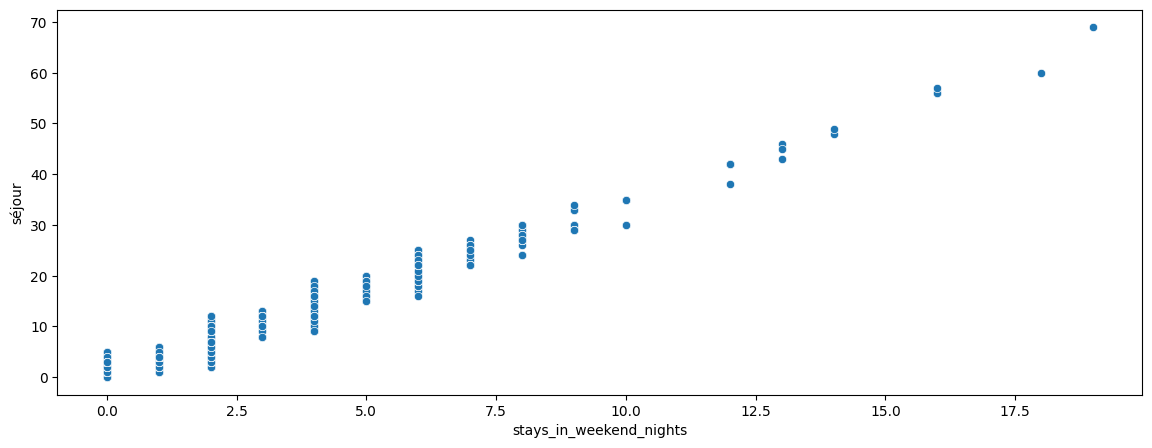

In [84]:
plt.figure(figsize=(14,5), dpi=100)
sns.scatterplot(df, x='stays_in_weekend_nights', y='séjour')

In [85]:
round(df['stays_in_weekend_nights'].mean(),2)

0.93

In [86]:
## liste des personnes qui passent plus de nuit les weekends

df[['stays_in_weekend_nights','name']].value_counts()[:10].sort_values(ascending=False)

stays_in_weekend_nights  name             
0                        Jennifer Smith       23
                         Michael Johnson      21
                         Robert Smith         21
                         Michael Smith        20
2                        Michael Johnson      18
0                        John Smith           18
2                        David Smith          18
0                        David Williams       17
2                        John Smith           17
0                        Christopher Smith    16
dtype: int64

In [87]:
## le coup total moyen d'un sejour à lhotel

df['cout_total_moyen'] = df['adr'] * df['séjour']
round(df['cout_total_moyen'].mean(),2)

357.85

In [88]:
## Les noms et emails des personnes qui ont fait 5 demandes régulieres

df[df['total_of_special_requests'] == 5][['name','email']]

,name,email
7860,Amanda Harper,Amanda.H66@yahoo.com
11125,Laura Sanders,Sanders_Laura@hotmail.com
14596,Tommy Ortiz,Tommy_O@hotmail.com
14921,Gilbert Miller,Miller.Gilbert@aol.com
14922,Timothy Torres,TTorres@protonmail.com
24630,Jennifer Weaver,Jennifer_W@aol.com
27288,Crystal Horton,Crystal.H@mail.com
27477,Brittney Burke,Burke_Brittney16@att.com
29906,Cynthia Cabrera,Cabrera.Cynthia@xfinity.com
29949,Sarah Floyd,Sarah_F@gmail.com


In [89]:
## Le pourcentage de séjour à l'hotel considéré comme client régulier

round(sum(df['is_repeated_guest'] == 1) / len(df)*100,2)


3.19

In [90]:
titre = 'carolin conley Md'

In [91]:
titre.split(" ")[-1]

'Md'

In [92]:
df['name'].apply(lambda titre : titre.split(" ")[-1] ).value_counts()[:5]

Smith       2503
Johnson     1990
Williams    1618
Jones       1434
Brown       1423
Name: name, dtype: int64

In [93]:
## Les noms des personnes qui avaient réservé pour le plus grand nombre d'enfants et bébé pour leurs séjours

df['total_enfant_bb'] = df['children'] + df['babies']

In [94]:
df.sort_values(['babies','children'], ascending=False)[['babies','name','children','total_enfant_bb']][:10]

,babies,name,children,total_enfant_bb
46619,10,Nicholas Parker,0.0,10.0
78656,9,Marc Robinson,0.0,9.0
84429,2,Jonathan Williams,1.0,3.0
84591,2,Rachel Ward,1.0,3.0
107837,2,Albert French,1.0,3.0
264,2,Patrick Wood,0.0,2.0
6719,2,Michael Pollard,0.0,2.0
7896,2,Colleen Phillips,0.0,2.0
14556,2,Angela Park,0.0,2.0
16677,2,Troy Davidson,0.0,2.0


In [104]:
## L'indicateur téléphonique les plus présents

titre1 = '451-254-9632'

In [105]:
titre1.split("-")[0]

'451'

In [106]:
df['phone-number'].apply(lambda titre1 : titre1.split("-")[0]).value_counts()[:3]

799    168
185    167
541    166
Name: phone-number, dtype: int64

In [124]:
### le nombre des arrivés entre le 1 et le 15 du mois.

df['arrival_date_day_of_month'].apply(lambda day:day in range(1,16)).sum()

58152

In [136]:
### Le nombre d'arriver par mois.

df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

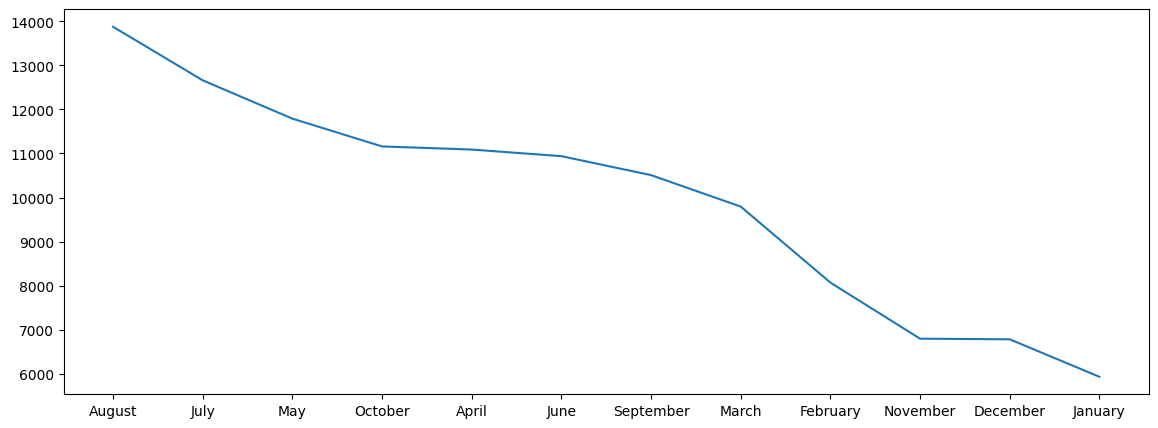

In [128]:
## Réprésentation graphique .
# Comme le montre le graphique, il ya plus d'arrivée au mois d'Août , cela peut être justifié par le fait que c'est un mois de vacances dans la plus part des pays étudiés



plt.figure(figsize=(14,5), dpi=100)
plt.plot(df['arrival_date_month'].value_counts())